## 1.Required Libraries 

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  

## 2.Insert dataset to work on and get some observations about it

In [15]:
#Read dataset
df = pd.read_csv('dataset.csv')

In [16]:
#Numer of rows and columns
print('Number of rows = {} and Number of columns = {}.'.format(df.shape[0],df.shape[1]))

Number of rows = 25 and Number of columns = 2.


In [73]:
#Columns names
df.columns
print('Columns names are : {} and {}.'.format(df.columns[0],df.columns[1]))

Columns names are : Hours and Scores.


In [18]:
#Show first 5 rows of the dataset
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

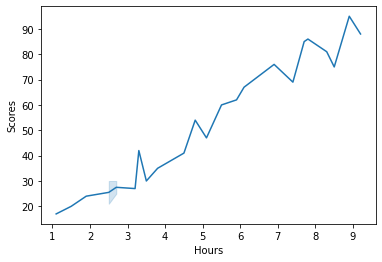

In [75]:
#Detect if there is linear retation
sns.lineplot(data=df, x="Hours", y="Scores")

### We can see here that as the number of hours studied increase the percentage score of student increase 

### [Positive Linear Relation]

## 3.Prepare data for our prediction model

In [24]:
#Divide data into inputs[X] and outputs[y] for the model
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [28]:
#Split data into training dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 4.Train our model

In [32]:
#Linear Regression model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

## 5.Make predictions

In [43]:
#Predict values based on test dataset
y_pred = regressor.predict(X_test)

In [60]:
#What will be predicted score if a student studies for 9.25 hrs/ day ? 
answer = regressor.predict([[9.25]])
print('The predicted score will be {} %.'.format(round(answer[0],2)))

The predicted score will be 93.69 %.


## 6.Evaluate Model

In [67]:
#Compare actual values and predicted values
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
compare_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


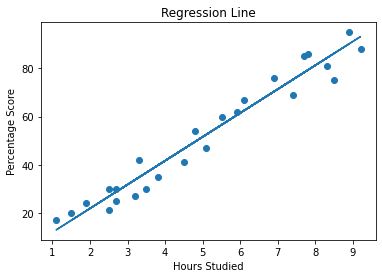

In [70]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Regression Line')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [71]:
#Get Error value where: 0-3 very good, 3-6 good, 6-9 average, 9-12 variable data and more than 12 is High variable data
error = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error= {}'.format(round(error,2))) 

Mean Absolute Error= 4.18
